In [1]:
pip install numba

#BooleAn Networks on Gpu (BANG) - demonstration
This notebook showcases abilities of BANG, a python library for simulation of Probabilistic Boolean Networks on GPU.

In [1]:
pip install -i https://test.pypi.org/simple/ --extra-index-url https://pypi.org/simple/ bang-gpu==0.0.1a1

Looking in indexes: https://test.pypi.org/simple/, https://pypi.org/simple/
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 71.4 MB/s eta 0:00:00


##What is a (Probabilistic) Boolean Network?
Probabilistic Boolean Networks are mathematical structures consisting of a set of Boolean variables as well as one or more functions corresponding to each variable and computing its state based on current values of variables. Eventually after long enough time states of these Networks stabilize into just a few constantly recurring values called "attractors"

##What are Probabilistic Boolean Networks used for?
Probabilistic Boolean Networks in spite of a relatively simple structure allow to model behaviour of complex systems in discrete time series. One of the most often modelled objects are **Gene Regulatory Networks**, used for modelling evolution of cell in a time period. Nodes of Boolean Networks correspond well to the genes of a cell and attractors are a great representation of final stages of cell evolution. 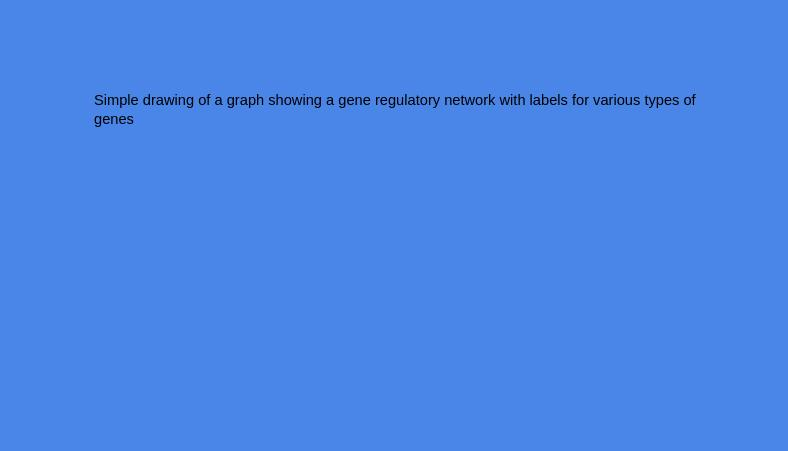

##Loading network from a file

Probabilistic Boolean Networks can be represented in an .*sbml* format which is an extension of XML and a standard for representing biological models.

Alternatively we can import files in .*pbn* format which was used in previous software modelling PBNs.

We start by downloading file containing a simple PBN.

In [2]:
import requests

url = "https://raw.githubusercontent.com/pavozayac/bang/refs/heads/main/tests/test2.pbn"

response = requests.get(url)
content = response.text

with open("example_network.pbn", "w") as file:
    file.write(content)

Now we can load Probabilistic Boolean Network from this file


In [6]:
import bang

pbn = bang.load_from_file("example_network.pbn", "assa")

name: x0
name: x1
name: x2


This method writes down names of the nodes of our network. Now we can load data from our PBN into our module simulating Network:

In [9]:
bang.initialise_PBN(pbn)

AttributeError: module 'bang' has no attribute 'initialise_PBN'

Now our Probabilistic Boolean Network is ready to be simulated on GPU! <br>
We can run a simple test that runs five steps on multiple Networks at once and returns their states.
WARNING: We need to be sure to have GPU supporting CUDA on our machine.

In [ ]:
from numba import cuda

#We make sure to have CUDA
gpu_available = cuda.is_available()
if not gpu_available:
  print("Device with CUDA required!")
else:
  bang.german_gpu_run()

NameError: name 'gpu_available' is not defined